In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

In [2]:
# get the CIFAR10 dataset
from tensorflow.keras.datasets import cifar10

In [3]:
# load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 91s 1us/step


In [6]:
x_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 1))

There is a total of 60000 images of 10 different classes naming , ,, , ,,,,,. All the images are of size 32×32. There are in total 50000 train images and 10000 test images.

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [12]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

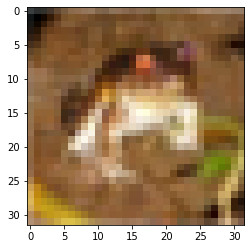

In [15]:
plt.imshow(x_train[0],cmap='gray') # first image

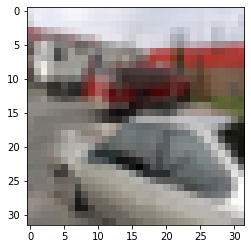

In [16]:
plt.imshow(x_train[-1],cmap='gray') # last image

### Normalize Data

We know that the pixel values for each image in the dataset are unsigned integers in the range between no color and full color, or 0 and 255.<br>
So to scale them we normalize the pixel values by rescaling them to the range [0,1]

In [17]:
x_train=x_train/255.0
x_test=x_test/255.0

In [81]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

### Convolutional Neural Netwroks - CNN

VGG (Visual Geometry Group) models : The architecture involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer. We will first try a basic Model with 1 , 2 and 3 blocks<br>
Moreover, it is now still one of the most popular image recognition architectures.<br>
ReLU stands for rectified linear unit activation function; it is a piecewise linear function that will output the input if positive; otherwise, the output is zero

### Basic Model

In [93]:
#Basic Model - 1-block VGG
model=Sequential()
model.add(InputLayer(input_shape=(32,32,3)))
model.add(Reshape(target_shape=(32,32,3)))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10)) #The dense has to be 10 because we have 10 classes in our dataset

In [94]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [95]:
model.fit(x_train,y_train,validation_split=0.10,epochs=30)

Epoch 1/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5381 - accuracy: 0.4520 - val_loss: 1.2837 - val_accuracy: 0.5522
Epoch 2/30
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2264 - accuracy: 0.5716 - val_loss: 1.1841 - val_accuracy: 0.5874
Epoch 3/30
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1191 - accuracy: 0.6110 - val_loss: 1.1358 - val_accuracy: 0.6034
Epoch 4/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0593 - accuracy: 0.6316 - val_loss: 1.1006 - val_accuracy: 0.6236
Epoch 5/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.0114 - accuracy: 0.6495 - val_loss: 1.0520 - val_accuracy: 0.6368
Epoch 6/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9768 - accuracy: 0.6602 - val_loss: 1.0436 - val_accuracy: 0.6398
Epoch 7/30
1407/1407 [==============================] - 9s 7ms/step - loss: 0.9464 - accuracy: 0.6710 - val_loss: 1.0392 - val_accur

In [96]:
_,accuracy=model.evaluate(x_test,y_test)
#_ hata göstreyiro , evaluate deyine 1. loss 2. accuracy, _, yapmak la 1. skip yaptik

313/313 [==============================] - 1s 2ms/step - loss: 1.1737 - accuracy: 0.6221


In [97]:
_

1.1737327575683594

In [104]:
#Basic Model with 2 VGG blocks
model=Sequential()
model.add(InputLayer(input_shape=(32,32,3)))
model.add(Reshape(target_shape=(32,32,3)))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu')) #added a second block
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10))

In [99]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [100]:
model.fit(x_train,y_train,validation_split=0.10,epochs=30)

Epoch 1/30
1407/1407 [==============================] - 18s 12ms/step - loss: 1.6189 - accuracy: 0.4105 - val_loss: 1.3642 - val_accuracy: 0.5100
Epoch 2/30
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2973 - accuracy: 0.5397 - val_loss: 1.1749 - val_accuracy: 0.5870
Epoch 3/30
1407/1407 [==============================] - 17s 12ms/step - loss: 1.1513 - accuracy: 0.5993 - val_loss: 1.1064 - val_accuracy: 0.6148
Epoch 4/30
1407/1407 [==============================] - 17s 12ms/step - loss: 1.0653 - accuracy: 0.6301 - val_loss: 1.0729 - val_accuracy: 0.6206
Epoch 5/30
1407/1407 [==============================] - 16s 12ms/step - loss: 1.0047 - accuracy: 0.6488 - val_loss: 0.9926 - val_accuracy: 0.6454
Epoch 6/30
1407/1407 [==============================] - 16s 12ms/step - loss: 0.9595 - accuracy: 0.6669 - val_loss: 0.9565 - val_accuracy: 0.6696
Epoch 7/30
1407/1407 [==============================] - 17s 12ms/step - loss: 0.9195 - accuracy: 0.6800 - val_loss: 0.9116 -

In [101]:
_,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9745 - accuracy: 0.6934


<font color=darkgreen>**Results for basic Models:**<br></font>
Basic Model with **1-block VGG: 62%**<br>
Basic Model with **2-block VGG: 69%**<br>
Basic Model with **3-block VGG: Error on my hand..**<br>
We can see that our results are better with 2-block VGG's<br>
(I tried to run a 3-block VGG but it showed me an error which I couldn't solve with googling)

### Develop a model with Regularization for improvement

We will try 3 different Regularitaion methods with our 2-base VGG model:<br>
Dropout, Weight Decay and Data Augmentation

Try second model with Regularization techniques - **Dropout Regularization:**<br>
Dropout is a simple technique that will randomly drop nodes out of the network. It has a regularizing effect as the remaining nodes must adapt to pick-up the slack of the removed nodes.<br>
We use a fixed dropout rate of 20% (e.g. retain 80% of the nodes)

In [44]:
from keras.layers import Dropout

In [108]:
#Model with Dropout Regularization
model2=Sequential()
model2.add(InputLayer(input_shape=(32,32,3)))
model2.add(Reshape(target_shape=(32,32,3)))
model2.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model2.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2)) # added Dropout Regularization
model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(10))

In [109]:
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [110]:
model2.fit(x_train,y_train,validation_split=0.10,epochs=30)

Epoch 1/30
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6304 - accuracy: 0.4032 - val_loss: 1.3522 - val_accuracy: 0.5150
Epoch 2/30
1407/1407 [==============================] - 14s 10ms/step - loss: 1.3483 - accuracy: 0.5180 - val_loss: 1.1946 - val_accuracy: 0.5828
Epoch 3/30
1407/1407 [==============================] - 15s 10ms/step - loss: 1.2366 - accuracy: 0.5622 - val_loss: 1.1167 - val_accuracy: 0.6096
Epoch 4/30
1407/1407 [==============================] - 14s 10ms/step - loss: 1.1563 - accuracy: 0.5937 - val_loss: 1.0368 - val_accuracy: 0.6334
Epoch 5/30
1407/1407 [==============================] - 15s 11ms/step - loss: 1.0947 - accuracy: 0.6133 - val_loss: 0.9949 - val_accuracy: 0.6528
Epoch 6/30
1407/1407 [==============================] - 14s 10ms/step - loss: 1.0458 - accuracy: 0.6333 - val_loss: 0.9509 - val_accuracy: 0.6696
Epoch 7/30
1407/1407 [==============================] - 15s 11ms/step - loss: 1.0086 - accuracy: 0.6453 - val_loss: 0.9151 -

In [111]:
_,accuracy=model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7924 - accuracy: 0.7276


Our model with Dropout has an accuray of 73% where the model without Dropout has an accuracy of 69%<br>
We can see that Dropout performed well in our  model

Try another Regularization technique - **Weight Decay**:<br>
Weight regularization or weight decay involves updating the loss function to penalize the model in proportion to the size of the model weights.<br>
This has a regularizing effect, as larger weights result in a more complex and less stable model, whereas smaller weights are often more stable and more general.

In [70]:
from keras.regularizers import l2

we will use _L2 weight regularization_, the most common type used for neural networks and a sensible default weighting of 0.001.

In [112]:
#Model with Weight Decay
model2=Sequential()
model2.add(InputLayer(input_shape=(32,32,3)))
model2.add(Reshape(target_shape=(32,32,3)))
model2.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu', kernel_regularizer=l2(0.001))) # added Weight Decay
model2.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu', kernel_regularizer=l2(0.001)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', kernel_regularizer=l2(0.001)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(10))

In [113]:
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [114]:
model2.fit(x_train,y_train,validation_split=0.10,epochs=30)

Epoch 1/30
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6716 - accuracy: 0.4104 - val_loss: 1.5171 - val_accuracy: 0.4758
Epoch 2/30
1407/1407 [==============================] - 14s 10ms/step - loss: 1.3890 - accuracy: 0.5253 - val_loss: 1.3232 - val_accuracy: 0.5580
Epoch 3/30
1407/1407 [==============================] - 14s 10ms/step - loss: 1.2554 - accuracy: 0.5787 - val_loss: 1.1769 - val_accuracy: 0.6154
Epoch 4/30
1407/1407 [==============================] - 14s 10ms/step - loss: 1.1661 - accuracy: 0.6167 - val_loss: 1.1193 - val_accuracy: 0.6402
Epoch 5/30
1407/1407 [==============================] - 14s 10ms/step - loss: 1.1021 - accuracy: 0.6428 - val_loss: 1.0957 - val_accuracy: 0.6452
Epoch 6/30
1407/1407 [==============================] - 14s 10ms/step - loss: 1.0588 - accuracy: 0.6589 - val_loss: 1.0812 - val_accuracy: 0.6526
Epoch 7/30
1407/1407 [==============================] - 15s 10ms/step - loss: 1.0214 - accuracy: 0.6742 - val_loss: 1.0493 -

In [85]:
_,accuracy=model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0811 - accuracy: 0.6452


Our model with Weight Decay has an accuray of 64,52%%, a worse perfomance then using Dropouts with 73%

Try **Data Augmentation**:<br>
Data augmentation involves making copies of the examples in the training dataset with small random modifications.<br>
It both expands the training dataset and allows the model to learn the same general features, although in a more generalized manner<br>

In [115]:
from keras.preprocessing.image import ImageDataGenerator

We will investigate the effect of simple augmentation on the baseline image, specifically horizontal flips and 10% shifts in the height and width of the image.

In [121]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size=64)

In [122]:
model2=Sequential()
model2.add(InputLayer(input_shape=(32,32,3)))
model2.add(Reshape(target_shape=(32,32,3)))
model2.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu',))
model2.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu',))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',))
model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(10))

In [123]:
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [124]:
steps = int(x_train.shape[0] / 64)
model2.fit(it_train, steps_per_epoch=steps, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
781/781 [==============================] - 20s 25ms/step - loss: 1.7380 - accuracy: 0.1080 - val_loss: 1.4475 - val_accuracy: 0.0663
Epoch 2/30
781/781 [==============================] - 19s 24ms/step - loss: 1.4707 - accuracy: 0.0966 - val_loss: 1.4341 - val_accuracy: 0.1277
Epoch 3/30
781/781 [==============================] - 19s 24ms/step - loss: 1.3380 - accuracy: 0.0953 - val_loss: 1.2347 - val_accuracy: 0.0904
Epoch 4/30
781/781 [==============================] - 19s 24ms/step - loss: 1.2615 - accuracy: 0.0966 - val_loss: 1.1105 - val_accuracy: 0.0951
Epoch 5/30
781/781 [==============================] - 19s 25ms/step - loss: 1.2037 - accuracy: 0.0961 - val_loss: 1.0912 - val_accuracy: 0.1067
Epoch 6/30
781/781 [==============================] - 19s 25ms/step - loss: 1.1649 - accuracy: 0.0977 - val_loss: 1.1755 - val_accuracy: 0.0780
Epoch 7/30
781/781 [==============================] - 19s 24ms/step - loss: 1.1262 - accuracy: 0.0971 - val_loss: 1.1678 - val_accuracy:

In [125]:
_,accuracy=model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8592 - accuracy: 0.1035


I think I didn't do the Data Augmentation right, because the results should be more than 10%...<br>
I hope prof. Zafer can help me with this problem later on and try to understand how to implement Data Augmentation (if it is a helpfull method)... :)

<font color=darkgreen>**Results for models with Regularization methods:**<br></font>
Model with **Dropout: 73%**<br>
Model with **Weight Decay: 64,52%**<br>
(Model with **Data Augmentation: 10%***)<br>
We can see that our results are better when using Dropout instead of Weight Decay method.<br>
(*Data Augmentation was a failure on my end and the result is probably not right so I am going to ignore this method for now.)

### Try to further improve Model

Our Results show us that the Dropout methos had a good effect on our accuracy score. So we can try to look more into Dropout methods.<br>
We will try to **increace the dropout percentage** for each block

In [127]:
#Model with increased Dropout Regularization
model3=Sequential()
model3.add(InputLayer(input_shape=(32,32,3)))
model3.add(Reshape(target_shape=(32,32,3)))
model3.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model3.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.4)) # increase the dropout percentage from 0.2 to 0.4
model3.add(Flatten())
model3.add(Dense(10))

In [128]:
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [129]:
model3.fit(x_train,y_train,validation_split=0.10,epochs=30)

Epoch 1/30
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6620 - accuracy: 0.3883 - val_loss: 1.3658 - val_accuracy: 0.5144
Epoch 2/30
1407/1407 [==============================] - 15s 11ms/step - loss: 1.3690 - accuracy: 0.5065 - val_loss: 1.2602 - val_accuracy: 0.5558
Epoch 3/30
1407/1407 [==============================] - 15s 11ms/step - loss: 1.2642 - accuracy: 0.5493 - val_loss: 1.2325 - val_accuracy: 0.5696
Epoch 4/30
1407/1407 [==============================] - 15s 11ms/step - loss: 1.1821 - accuracy: 0.5790 - val_loss: 1.0293 - val_accuracy: 0.6312
Epoch 5/30
1407/1407 [==============================] - 15s 10ms/step - loss: 1.1187 - accuracy: 0.6031 - val_loss: 0.9892 - val_accuracy: 0.6506
Epoch 6/30
1407/1407 [==============================] - 14s 10ms/step - loss: 1.0766 - accuracy: 0.6192 - val_loss: 1.0163 - val_accuracy: 0.6444
Epoch 7/30
1407/1407 [==============================] - 15s 10ms/step - loss: 1.0421 - accuracy: 0.6322 - val_loss: 0.9571 -

In [130]:
_,accuracy=model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8279 - accuracy: 0.7072


in our model, increasing the dropout rate leads to a less accuracy with 71%

In [131]:
#Model with increased filters and Dropout Regularization
model3=Sequential()
model3.add(InputLayer(input_shape=(32,32,3)))
model3.add(Reshape(target_shape=(32,32,3)))
model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu')) # increased filter from 12 to 32
model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu')) # increased filter from 32 to 64
model3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.4)) #we increased the dropout percentage from 0.2 to 0.4
model3.add(Flatten())
model3.add(Dense(10))

In [132]:
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [133]:
model3.fit(x_train,y_train,validation_split=0.10,epochs=30)

Epoch 1/30
1407/1407 [==============================] - 34s 24ms/step - loss: 1.5976 - accuracy: 0.4160 - val_loss: 1.2551 - val_accuracy: 0.5438
Epoch 2/30
1407/1407 [==============================] - 34s 24ms/step - loss: 1.2099 - accuracy: 0.5714 - val_loss: 1.0703 - val_accuracy: 0.6278
Epoch 3/30
1407/1407 [==============================] - 34s 24ms/step - loss: 1.0462 - accuracy: 0.6303 - val_loss: 0.8835 - val_accuracy: 0.6926
Epoch 4/30
1407/1407 [==============================] - 34s 24ms/step - loss: 0.9531 - accuracy: 0.6647 - val_loss: 0.8202 - val_accuracy: 0.7160
Epoch 5/30
1407/1407 [==============================] - 33s 23ms/step - loss: 0.8917 - accuracy: 0.6871 - val_loss: 0.7886 - val_accuracy: 0.7316
Epoch 6/30
1407/1407 [==============================] - 33s 23ms/step - loss: 0.8491 - accuracy: 0.7014 - val_loss: 0.7677 - val_accuracy: 0.7320
Epoch 7/30
1407/1407 [==============================] - 33s 24ms/step - loss: 0.8204 - accuracy: 0.7123 - val_loss: 0.7347 -

In [134]:
_,accuracy=model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.6952 - accuracy: 0.7625


when increasing the filters from the Conv2D we get a result of 76%

Adding **Batch Normalization**:<br>
Batch normalization is a technique designed to automatically standardize the inputs to a layer in a deep learning neural network. <br>
It has the effect of dramatically accelerating the training process of a neural network, and in some cases improves the performance of the model via a modest regularization effect.

In [136]:
from keras.layers import BatchNormalization

In [145]:
#Model with Batch Normalization
model3=Sequential()
model3.add(InputLayer(input_shape=(32,32,3)))
model3.add(Reshape(target_shape=(32,32,3)))
model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu')) # increased filter from 12 to 32
model3.add(BatchNormalization()) #added Batch Normalization
model3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu')) # increased filter from 32 to 64
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model3.add(BatchNormalization()) #added Batch Normalization
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.4)) #we increased the dropout percentage from 0.2 to 0.4
model3.add(Flatten())
model3.add(BatchNormalization())
model3.add(Dense(10))

In [146]:
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [147]:
model3.fit(x_train,y_train,validation_split=0.10,epochs=30)

Epoch 1/30
1407/1407 [==============================] - 43s 30ms/step - loss: 1.5824 - accuracy: 0.4603 - val_loss: 1.2464 - val_accuracy: 0.5646
Epoch 2/30
1407/1407 [==============================] - 41s 29ms/step - loss: 1.1326 - accuracy: 0.6070 - val_loss: 1.0864 - val_accuracy: 0.6294
Epoch 3/30
1407/1407 [==============================] - 40s 29ms/step - loss: 1.0097 - accuracy: 0.6512 - val_loss: 1.0393 - val_accuracy: 0.6386
Epoch 4/30
1407/1407 [==============================] - 41s 29ms/step - loss: 0.9219 - accuracy: 0.6811 - val_loss: 0.9889 - val_accuracy: 0.6634
Epoch 5/30
1407/1407 [==============================] - 40s 28ms/step - loss: 0.8804 - accuracy: 0.6961 - val_loss: 0.9085 - val_accuracy: 0.6906
Epoch 6/30
1407/1407 [==============================] - 40s 28ms/step - loss: 0.8271 - accuracy: 0.7150 - val_loss: 0.7773 - val_accuracy: 0.7320
Epoch 7/30
1407/1407 [==============================] - 39s 28ms/step - loss: 0.7951 - accuracy: 0.7267 - val_loss: 0.7457 -

In [148]:
_,accuracy=model3.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.6777 - accuracy: 0.7748


Adding Batch Normalization increased our results slightly to 77%

<font color=darkgreen>**Results:**<br></font>
Model with **increased Dropout: 71%**<br>
Model with **incresed Dropout and Filter: 76%**<br>
Model with **incresed Dropout and Filter with Batch Normalization: 77%**<br>
Our best model is with increased Dropout, Filters and adding Batch Normalization.

Now lets bring our best model home to colab and try with more epochs, otherwise my PC is going to explode.

On Colab, with an epoch of 200 our result ended with an accuracy of 81,62%

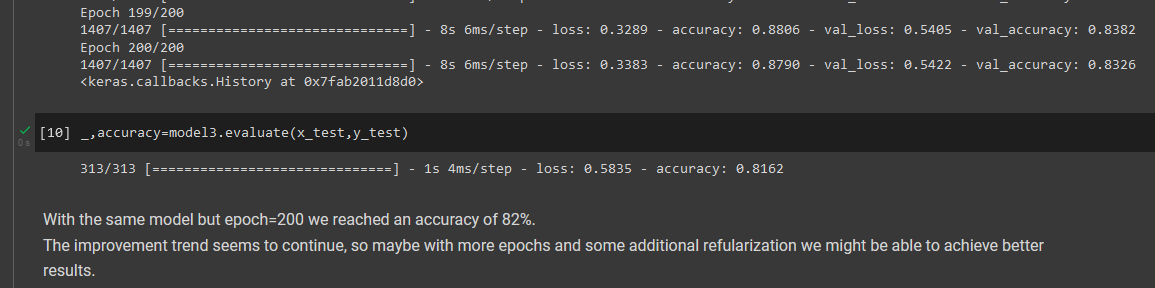

### What I learned while trying to solve this project:
At first I had no Idea how to approach this project, because I did not fully understand the concept behindt it in our lessons. I did run the few code lines, which we learned in the MNIST example with the CIFAR dataset and had an accuracy of only 55% and thought this can't be all there is to it. With the help of the internet I learned step by step new things and want to share them, so it can be helpful to our other members in our bootcamp and also a little summary for myself.<br>
<br>
* <font color=darkgreen>**Model Archcitectures:**</font><br>I learned that there are a good amount of different architecture types for CNN models like LeNet, ResNet, VGG etc. For example VGG involves stacking layers with small 3x3 filters followed by a max pooling layer
* <font color=darkgreen>**Filters:**</font><br>The number of filters in each block is increased with the depth of the network such as 32, 64, 128, 256. By increasing them the results can get better
* <font color=darkgreen>**Regularizations:**</font><br>Regularization methods help to adress rapid overfitting of the test dataset, by slowing down the rate of learning of the model. For example Dropout our Weight Decay Regularizations.
* <font color=darkgreen>**Data Augmentation:**</font><br>By copying the examples in the training dataest with small random modifications, such as horizontal flip, minor shifts of image or small zooming, croppin etc., data augmentation expands the training dataset and allows the model to learn in a more generalized manner
* <font color=darkgreen>**Batch Normalization**</font><br>
* <font color=darkgreen>**Combining different mehtods:**</font><br>You can combine all of the above and try to see which methods work better together to achieve better results.
<br>
* <h3> Don't use Jupyter because it took so much time just to load one of the models with just only 30 epochs, while running this on colab with GPU Runtime made it so much faster even with 200 epochs...(I wrote this last part way later after realising this.. and now I am crying for all the lost time I spend.. :) </h2>